**II. Ridge regression**

**III. Lasso**

In [234]:
import numpy as np
np.set_printoptions(suppress=True) #prevent numpy exponential notation on print

import pandas as pd
import mglearn

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge

%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

**1. Wave dataset**

**OSL:** $y_i = \beta_0 + \beta_1 x_{1, i} + \epsilon_i$ for $i = 1, 2, ..., 75$



Training set score: 0.61
Test set (generalization) score: 0.62


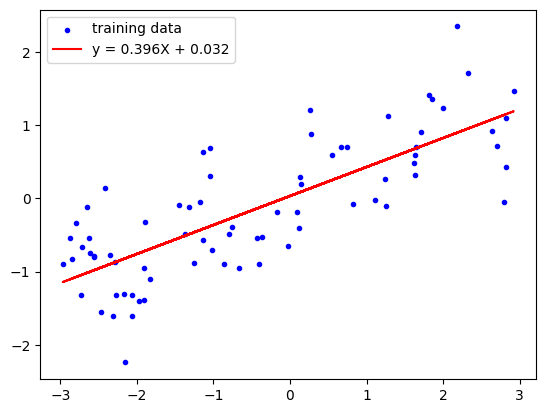

In [237]:
X_wave, y_wave = mglearn.datasets.make_wave()
X_wave_train, X_wave_test, y_wave_train, y_wave_test = train_test_split(X_wave, y_wave, random_state=0)

lr_wave = LinearRegression().fit(X_wave_train, y_wave_train)

plt.scatter(X_wave_train, y_wave_train, c = 'b', marker='.', label ='training data')
plt.plot(X_wave_train, lr_wave.predict(X_wave_train), c = 'r', label = 'y = {0}X + {1}'.format(round(lr_wave.coef_[0], 3), round(lr_wave.intercept_, 3)))
plt.legend()

print("Training set score: {:.2f}".format(lr_wave.score(X_wave_train, y_wave_train)))
print("Test set (generalization) score: {:.2f}".format(lr_wave.score(X_wave_test, y_wave_test)))

**2. Boston Housing dataset**

**OLS:** $y_i = \beta_0 + \beta_1 x_{1, i} + \beta_2 x_{2, i} + \cdots + \beta_{13} x_{13, i} + \epsilon_i$ for i = 1, 2, ..., 506.

- *CRIM*: per capita crime rate by town
- *ZN*: proportion of residential land zoned for lots over 25,000 sq.ft.
- *INDUS*: proportion of non-retail business acres per town.
- *CHAS*: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- *NOX*: nitric oxides concentration (parts per 10 million)
- *RM*: average number of rooms per dwelling
- *AGE*: proportion of owner-occupied units built prior to 1940
- *DIS*: weighted distances to five Boston employment centres
- *RAD*: index of accessibility to radial highways
- *TAX*: full-value property-tax rate per $10,000
- *PTRATIO*: pupil-teacher ratio by town
- *B*: $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- *LSTAT*: % lower status of the population
- *Outcome*: Median value of owner-occupied homes in $1000's



In [276]:
from fairlearn.datasets import fetch_boston
X_boston, y_boston = fetch_boston(return_X_y = True)

print(X_boston.dtypes) # check the data types of the columns
X_boston['CHAS'] = X_boston['CHAS'].astype(float)
X_boston['RAD'] = X_boston['RAD'].astype(float)

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object


C:\Users\pquyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\fairlearn\datasets\_fetch_boston.py:135: DataFairnessWarning: You are about to use a dataset with known fairness issues.
  warnings.warn(DataFairnessWarning(msg))


The discrepancy between performance on the training set and the test set is a clear sign of overfitting

In [283]:
X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(X_boston, y_boston, random_state=0)
lr_boston = LinearRegression().fit(X_boston_train, y_boston_train)

print("Training set score: {:.2f}".format(lr_boston.score(X_boston_train, y_boston_train)))
print("Test set (generalization) score: {:.2f}".format(lr_boston.score(X_boston_test, y_boston_test)))

boston_betas = pd.DataFrame(list(X_boston), columns=['predictors'])
boston_betas = boston_betas.assign(lr_betas_hat = lr_boston.coef_)
display(boston_betas)

Training set score: 0.77
Test set (generalization) score: 0.64


,predictors,lr_betas_hat
0,CRIM,-0.117735
1,ZN,0.044017
2,INDUS,-0.005768
3,CHAS,2.393416
4,NOX,-15.589421
5,RM,3.768968
6,AGE,-0.007035
7,DIS,-1.434956
8,RAD,0.240081
9,TAX,-0.011297


**Ridge regression:**

In [284]:
ridge_boston = Ridge().fit(X_boston_train, y_boston_train)

print("Training set score: {:.2f}".format(ridge_boston.score(X_boston_train, y_boston_train)))
print("Test set score: {:.2f}".format(ridge_boston.score(X_boston_test, y_boston_test)))

boston_betas = boston_betas.assign(ridge_betas_hat = ridge_boston.coef_)
display(boston_betas)

Training set score: 0.77
Test set score: 0.63


,predictors,lr_betas_hat,ridge_betas_hat
0,CRIM,-0.117735,-0.114786
1,ZN,0.044017,0.045418
2,INDUS,-0.005768,-0.035403
3,CHAS,2.393416,2.303291
4,NOX,-15.589421,-8.127445
5,RM,3.768968,3.806341
6,AGE,-0.007035,-0.014282
7,DIS,-1.434956,-1.336939
8,RAD,0.240081,0.216748
9,TAX,-0.011297,-0.011755


Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization.

In [286]:
ridge10_boston = Ridge(alpha=10).fit(X_boston_train, y_boston_train)
print("Training set score: {:.2f}".format(ridge10_boston.score(X_boston_train, y_boston_train)))
print("Test set score: {:.2f}".format(ridge10_boston.score(X_boston_test, y_boston_test)))

Training set score: 0.76
Test set score: 0.61


In [287]:
ridge01_boston = Ridge(alpha=0.1).fit(X_boston_train, y_boston_train)
print("Training set score: {:.2f}".format(ridge01_boston.score(X_boston_train, y_boston_train)))
print("Test set score: {:.2f}".format(ridge01_boston.score(X_boston_test, y_boston_test)))

Training set score: 0.77
Test set score: 0.63


A higher alpha means a more restricted model, so we expect the estimated coefficients to have smaller magnitude for a high value of alpha than for a low value of alpha

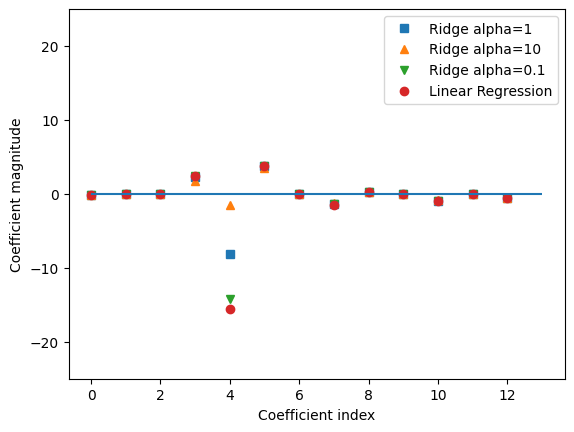

In [289]:
plt.plot(ridge_boston.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10_boston.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01_boston.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr_boston.coef_, 'o', label="Linear Regression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr_boston.coef_))
plt.ylim(-25, 25)
plt.legend()

The training score is higher than the test score for all dataset sizes, for both ridge and linear regression. Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board. However, the test score for ridge is better, particularly for small subsets of the data. The lesson here is that with enough training data, regularization becomes less important, and given enough data, and ridge linear regression will have the same performance.

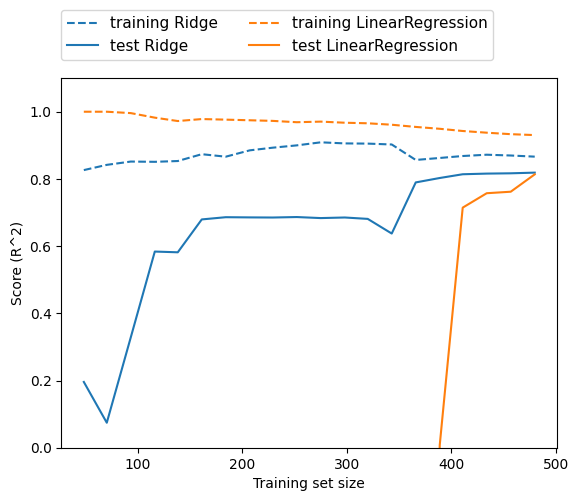

In [290]:
mglearn.plots.plot_ridge_n_samples()